In [1]:
import sys 
import numpy as np
sys.path.insert(0, '../src')

import populations
import matplotlib.pyplot as plt
import powerlaw

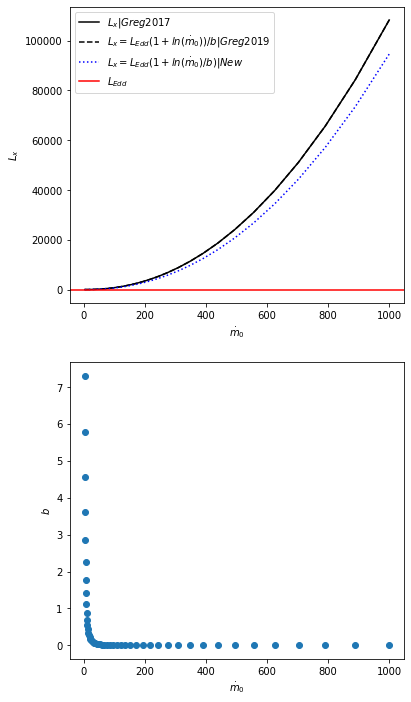

In [2]:
# There is a slight difference between the two luminosities calculated by greg in his 2017 and 2019 paper, with the latter ommiting the
# different calculation of Lx for mt < 1. However it is likely that for our bright ULXs all our sources will be mdot > 1 and so the effect
# of this does not matter. 
# HOWEVER if we are seeking to show the entire XLF in our paper, then the luminosities at low mdot should be properly calculated.
b = 0.032
L_edd = 1

#mdot = np.linspace(0.5,15, 1000)
mdot = np.logspace(0.5,3, 50)

b    = 73 / mdot**2

Lx = np.where(mdot > 1, (L_edd * (1 + np.log(mdot)))/b, (L_edd * mdot) / b)
Lx1 = (L_edd * (1 + np.log(mdot))) / b
Lx2 = L_edd * (1 + np.log(mdot)/b)

fig, ax = plt.subplots(2,1, figsize=(6,12))
ax[0].set_xlabel(r'$\dot{m}_{0}$')
ax[0].set_ylabel(r'$L_{x}$')
ax[1].set_xlabel(r'$\dot{m}_{0}$')
ax[1].set_ylabel(r'$b$')
ax[1].scatter(mdot, b)



ax[0].plot(mdot, Lx, label=r'$L_{x}  | Greg 2017$', c='black')
ax[0].plot(mdot, Lx1, label=r'$L_{x} = L_{Edd} (1+ln(\dot{m}_{0}))/b | Greg 2019$', c='black', linestyle='--')
ax[0].plot(mdot, Lx2, label=r'$L_{x} = L_{Edd} (1+ln(\dot{m}_{0})/b) | New$', c='blue', linestyle='dotted')

ax[0].axhline(L_edd, label=r'$L_{Edd}$', c='r')

ax[0].legend(loc='upper left')


In [12]:
df = populations.startrack_v2_mt_1_all(nrows=10000)
pop = populations.Population(df)

In [13]:
samp = pop.sample_systems(0.5, subset='all', return_df=True)

In [14]:
samp['Lx1'].min()

5.672484599589321e+33

In [15]:
samp = pop.sample_systems(0.5, subset='ulx', return_df=True)
samp['Lx1'].min()

1.0303820624251156e+39

In [16]:
pop.df.head()

,Unnamed: 0,original_row,t,dt,M_a,M_b,K_a,K_b,a,e,...,P_envelope_days,P_wind_days,P_orb,P_sup,P_sup_err,P_orb_days,P_sup_days,P_sup_err_days,T_eff_b,lmxrb
0,0,4428,4302.201328,0.44000,1.26,1.09,13,3,31.0,0.0,...,2.000944e-03,7.570170e-03,1.126707e+06,2.490022e+07,112670.699424,13.040590,288.197044,1.304059,4556.739616,0
1,1,4429,4302.255615,0.05400,1.26,1.08,13,3,31.0,0.0,...,5.777369e+07,3.966467e+10,1.129112e+06,2.495337e+07,112911.192119,13.068425,288.812193,1.306843,4580.786570,0
2,2,4441,4302.697052,0.43000,1.26,1.07,13,3,31.0,0.0,...,7.748990e+07,5.655114e+10,1.131532e+06,2.500686e+07,113153.231394,13.096439,289.431298,1.309644,4385.769237,0
3,3,4442,4302.697671,0.00062,1.26,1.06,13,3,32.0,0.0,...,7.748990e+07,5.655114e+10,1.189278e+06,2.628304e+07,118927.791948,13.764791,304.201875,1.376479,4385.769237,0
4,4,4454,4303.134219,0.43000,1.26,1.05,13,3,32.0,0.0,...,1.022118e+08,7.901463e+10,1.191849e+06,2.633987e+07,119184.933420,13.794552,304.859610,1.379455,4408.435466,0


In [17]:
pop.df.columns

Index(['Unnamed: 0', 'original_row', 't', 'dt', 'M_a', 'M_b', 'K_a', 'K_b',
       'a', 'e', 'R_a', 'R_b', 'L_a', 'L_b', 'spin_a', 'spin_b', 'mt',
       'mttype', 'Lxmt', 'Lx', 'dMmt_a', 'dMwind_a', 'dMmt_b', 'dMwind_b',
       'Vsm0', 'Vsm1', 'Vsm2', 'Mzams_a', 'Mzams_b', 'a0', 'e0', 'idum_run',
       'iidd_old', 'evroute', 'Z', 'is_bh', 'mdot_gs_a', 'mdot_gs_b', 'LEdd',
       'mdot_Edd', 'mdot_ratio', 'Lx_iso', 'log_Lx_iso', 'b', 'Lx1', 'log_Lx1',
       'theta', 'theta_deg', 'theta_half_deg', 'zeta', 'R_g', 'a*', 'r_schw',
       'r_isco_nospin', 'r_isco', 'r_sph', 'r_out', 'P_inflow_at_rsph',
       'P_envelope', 'P_wind', 'P_inflow_days', 'P_envelope_days',
       'P_wind_days', 'P_orb', 'P_sup', 'P_sup_err', 'P_orb_days',
       'P_sup_days', 'P_sup_err_days', 'T_eff_b', 'lmxrb'],
      dtype='object')

In [18]:
# Trying to recreate the table in the origin of the ULX - Greg 2017
print(pop.df_ulx.groupby(['Z','evroute'])['M_a','M_b'].agg(['mean']).to_string())

                                                                                           M_a        M_b
                                                                                          mean       mean
Z    evroute                                                                                             
0.02 CE1(3-1;7-1) MT1(8-1) MT1(9-1) MT2(12-1) AICNS1 MT2(13-1) MT2(13-2)              1.500000   1.491818
     CE1(3-1;7-1) MT1(8-1) MT1(9-1) MT2(12-1) AICNS1 MT2(13-1) MT2(13-2) MT2(13-3)    2.330000   0.273333
     CE1(4-1;7-1) SN1 MT2(14-2)                                                       7.911275   3.298859
     CE1(4-1;7-1) SN1 MT2(14-2) MT2(14-3)                                             7.920000   1.271250
     CE1(4-1;7-1) SN1 MT2(14-2) MT2(14-3) MT2(14-9)                                   7.960000   1.102000
     CE1(5-1;13-1) SN1 CE2(13-2;13-7) MT2(13-7)                                       1.130000   1.040000
     CE1(5-1;8-1) MT1(8-1) MT1(9-1) SN1 CE2(13

/home/x1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [19]:
pop.calc_bh_ns_ulx_sub_populations()

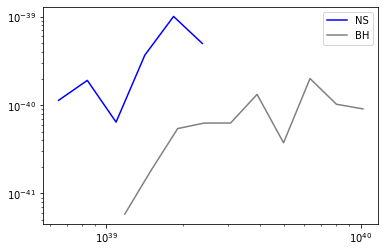

In [20]:
powerlaw.plot_pdf(pop.df_ulx_ns['Lx_iso'], label='NS', color='blue')
powerlaw.plot_pdf(pop.df_ulx_bh['Lx_iso'], label='BH', color='grey')
plt.legend()

In [21]:
df_ns = pop.df[pop.df['K_a'] == 13]
df_bh = pop.df[pop.df['K_a'] == 14]

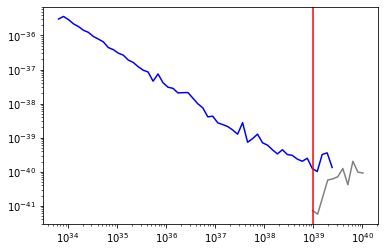

In [22]:
powerlaw.plot_pdf(df_ns['Lx_iso'], label='NS', color='blue')
powerlaw.plot_pdf(df_bh['Lx_iso'], label='NH', color='grey')
plt.axvline(1e39, color='r')

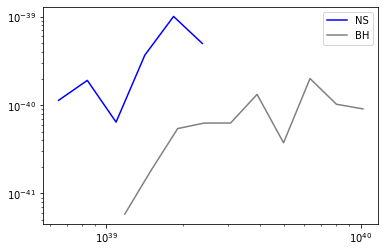

In [23]:
powerlaw.plot_pdf(pop.df_ulx_ns['Lx_iso'], label='NS', color='blue')
powerlaw.plot_pdf(pop.df_ulx_bh['Lx_iso'], label='BH', color='grey')
plt.legend()

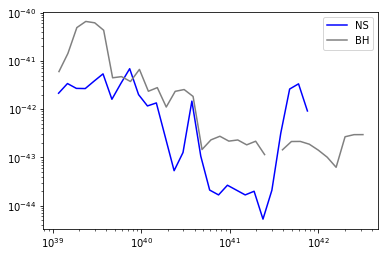

In [24]:
powerlaw.plot_pdf(pop.df_ulx_ns['Lx1'], label='NS', color='blue')
powerlaw.plot_pdf(pop.df_ulx_bh['Lx1'], label='BH', color='grey')
plt.legend()

5.672484599589321e+33


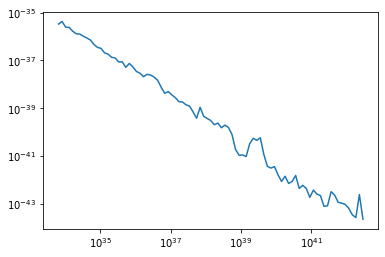

In [25]:
samp = pop.sample_systems(0.5, size=10000, subset='all', return_df=True)
plt.figure()
powerlaw.plot_pdf(samp['Lx1'])
print(samp.Lx1.min())

1.0303820624251156e+39


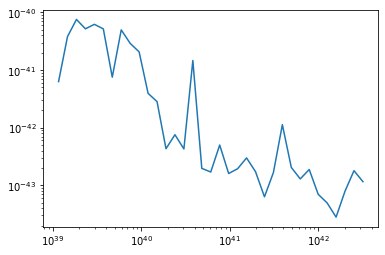

In [26]:
samp = pop.sample_systems(0.5, size=10000, subset='ulx', return_df=True)
plt.figure()
powerlaw.plot_pdf(samp['Lx1'])
print(samp['Lx1'].min())

In [27]:
L = samp['Lx1'].values
fit = powerlaw.Fit(L)

Calculating best minimal value for power law fit
/home/x1/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/x1/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [28]:
pop.df_ulx['Lx1'].min()

1.0303820624251156e+39

In [29]:
def calc_sampling_weights(self, df):
    """
    P_samp = system alive time / all system alive times.
    """
    logging.debug('Calculating sampling weights')
    gb = self.gb_sys(df)
    sys_time = gb[['dt']].sum() # system_on_time
    sys_time['P_samp'] = sys_time['dt'] / sys_time['dt'].sum()
    samp_weights = sys_time['P_samp']
    return samp_weights

In [30]:
pop.df.head()

,Unnamed: 0,original_row,t,dt,M_a,M_b,K_a,K_b,a,e,...,P_envelope_days,P_wind_days,P_orb,P_sup,P_sup_err,P_orb_days,P_sup_days,P_sup_err_days,T_eff_b,lmxrb
0,0,4428,4302.201328,0.44000,1.26,1.09,13,3,31.0,0.0,...,2.000944e-03,7.570170e-03,1.126707e+06,2.490022e+07,112670.699424,13.040590,288.197044,1.304059,4556.739616,0
1,1,4429,4302.255615,0.05400,1.26,1.08,13,3,31.0,0.0,...,5.777369e+07,3.966467e+10,1.129112e+06,2.495337e+07,112911.192119,13.068425,288.812193,1.306843,4580.786570,0
2,2,4441,4302.697052,0.43000,1.26,1.07,13,3,31.0,0.0,...,7.748990e+07,5.655114e+10,1.131532e+06,2.500686e+07,113153.231394,13.096439,289.431298,1.309644,4385.769237,0
3,3,4442,4302.697671,0.00062,1.26,1.06,13,3,32.0,0.0,...,7.748990e+07,5.655114e+10,1.189278e+06,2.628304e+07,118927.791948,13.764791,304.201875,1.376479,4385.769237,0
4,4,4454,4303.134219,0.43000,1.26,1.05,13,3,32.0,0.0,...,1.022118e+08,7.901463e+10,1.191849e+06,2.633987e+07,119184.933420,13.794552,304.859610,1.379455,4408.435466,0


In [31]:
df = pop.df
gb = pop.gb_sys(df)
sys_time = gb[['dt']].sum() # system_on_time
sys_time['P_samp'] = sys_time['dt'] / sys_time['dt'].sum()
samp_weights = sys_time['P_samp']

Text(0.5, 0, 'All Binary Lifetime Myr')

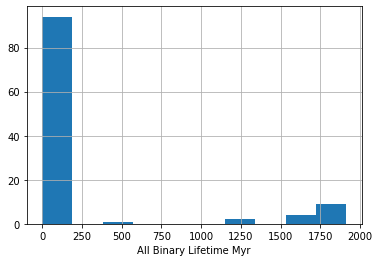

In [32]:
sys_time['dt'].hist()
plt.xlabel('All Binary Lifetime Myr')

Text(0.5, 0, 'All binary Lifetime (Myr)')

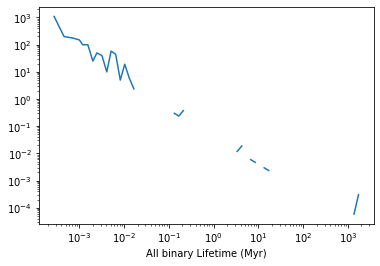

In [33]:
powerlaw.plot_pdf(sys_time['dt'].values)
plt.xlabel('All binary Lifetime (Myr)')
#plt.xticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])

Text(0.5, 0, 'All Binary Sampling probability')

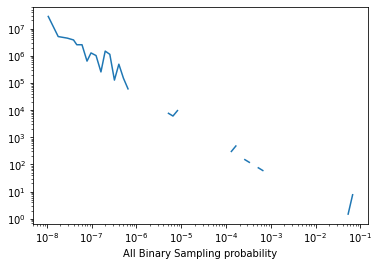

In [34]:
powerlaw.plot_pdf(sys_time['P_samp'].values)
plt.xlabel('All Binary Sampling probability')

In [35]:
df = pop.df_ulx
gb = pop.gb_sys(df)
sys_time = gb[['dt']].sum() # system_on_time
sys_time['P_samp'] = sys_time['dt'] / sys_time['dt'].sum()
samp_weights = sys_time['P_samp']

Text(0.5, 0, 'ULX Binary Lifetime Myr')

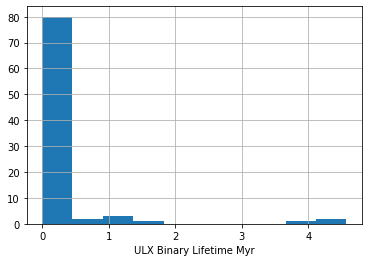

In [36]:
sys_time['dt'].hist()
plt.xlabel('ULX Binary Lifetime Myr')

([<matplotlib.axis.XTick at 0x7fa1535ae2e8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

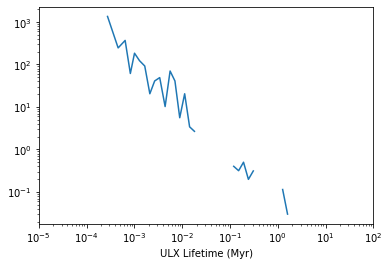

In [37]:
powerlaw.plot_pdf(sys_time['dt'].values)
plt.xlabel('ULX Lifetime (Myr)')
plt.xticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])

Text(0.5, 0, 'ULX Binary Sampling probability')

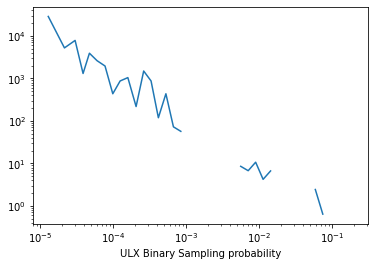

In [38]:
powerlaw.plot_pdf(sys_time['P_samp'].values)
plt.xlabel('ULX Binary Sampling probability')

In [39]:
samp_weights = pop.calc_sampling_weights(pop.df)

In [40]:
samp_weights_ulx = pop.calc_sampling_weights(pop.df_ulx)

In [41]:
samp_weights

idum_run  iidd_old
-100000   11058       1.066738e-03
          18180       1.416259e-07
          23318       1.010330e-08
          24816       7.161389e-09
          27303       2.357828e-08
                          ...     
          901448      9.728237e-09
          904569      7.927145e-08
          910443      2.266015e-05
          918029      2.113254e-07
          925922      1.780408e-02
Name: P_samp, Length: 110, dtype: float64

In [42]:
samp_weights_ulx

idum_run  iidd_old
-100000   11058       0.063897
          18180       0.000170
          23318       0.000012
          24816       0.000009
          27303       0.000028
                        ...   
          900993      0.000021
          901185      0.000014
          901448      0.000012
          904569      0.000095
          918029      0.000254
Name: P_samp, Length: 89, dtype: float64

In [43]:
samp_weights_ulx.sum()

1.0000000000000002

In [44]:
samp_weights.sum()

0.9999999999999998

In [45]:
unique = get_unique_system_counts(df_ulx_nuc)
unique

NameError: name 'get_unique_system_counts' is not defined

In [ ]:
counter = 0
for i, row in unique.iterrows():
    if counter < 20:
        idum, iidd = row['idum_run'], row['iidd_old']
        specific_system = get_system(df, idum, iidd)
        print(f'{idum} {iidd}')
        plot_system_luminosity_evolution(specific_system)
        plt.title(f'{idum} {iidd}')
        counter+=1

In [ ]:
pop = Population(df)

In [ ]:
pop.describe()

In [ ]:
df4 = pop.df_ulx_opening_angle_l_45

In [ ]:
array('i', df.head().index)

In [ ]:
df_ulx = df_ulx[df_ulx['P_wind_days'] < 4 * 365]
df_ulx.head()
export_binary_data(df_ulx.head())

In [ ]:
# working df
wdf = df_ulx.head(10000).copy()

In [46]:
def sum_time(df):
    df['t_sum'] = df['t'].sum()
    return df

In [47]:
wdf = wdf.groupby(['idum_run', 'iidd_old']).apply(sum_time)
t_tot = wdf['t'].sum()
wdf['t_weight'] = wdf['t_sum']/t_tot

NameError: name 'wdf' is not defined

In [48]:
wdf['t_weight'].sum()

NameError: name 'wdf' is not defined

In [49]:
t = pd.Dataframe()

NameError: name 'pd' is not defined

In [50]:
t

NameError: name 't' is not defined